<a href="https://colab.research.google.com/github/annsara95/ML_Personal_Projects/blob/master/GOOGL_Time_Series_Analysis_%26_Forecasting.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

In [69]:
from google.colab import files
uploaded = files.upload()

Saving GOOGL.xls to GOOGL (1).xls


**Past 3 year time series data of GOOGLE stock price**

In [0]:
df = pd.read_excel('GOOGL.xls', sheet_name='GOOGL', header=0)

In [71]:
df.dtypes

Date      datetime64[ns]
Open             float64
Close            float64
High             float64
Low              float64
Volume             int64
dtype: object

In [0]:
df.set_index('Date', inplace=True)

In [73]:
df.head()

,Open,Close,High,Low,Volume
Date,,,,,
2016-01-04,762.200012,759.440002,762.200012,747.539978,3369100
2016-01-05,764.099976,761.530029,769.200012,755.650024,2260800
2016-01-06,750.369995,759.330017,765.729980,748.000000,2410300
2016-01-07,746.489990,741.000000,755.309998,735.280029,3156600
2016-01-08,747.799988,730.909973,750.119995,728.919983,2375300


In [75]:
df.head()

,Open,Close,High,Low,Volume
Date,,,,,
2016-01-04,762.200012,759.440002,762.200012,747.539978,3369100
2016-01-05,764.099976,761.530029,769.200012,755.650024,2260800
2016-01-06,750.369995,759.330017,765.729980,748.000000,2410300
2016-01-07,746.489990,741.000000,755.309998,735.280029,3156600
2016-01-08,747.799988,730.909973,750.119995,728.919983,2375300


In [0]:
def plot_df(df, x, y, title="", xlabel='Date', ylabel='Value', dpi=100):
    plt.figure(figsize=(16,5), dpi=dpi)
    plt.plot(x, y, color='tab:red')
    plt.gca().set(title=title, xlabel=xlabel, ylabel=ylabel)
    plt.show()

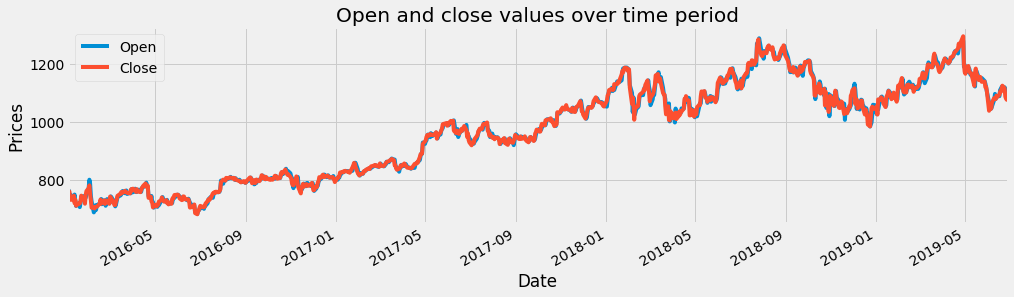

In [79]:
df.loc[df.index,['Open','Close']].plot(figsize=(15,4))
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('Open and close values over time period')
plt.show()

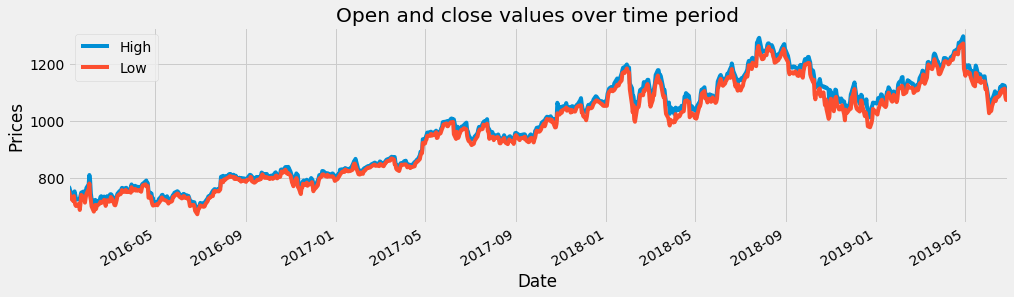

In [80]:
df.loc[df.index,['High','Low']].plot(figsize=(15,4))
plt.xlabel('Date')
plt.ylabel('Prices')
plt.title('Open and close values over time period')
plt.show()

**Test for MultiModality:**


> If distribution is unimodal - is it Uniform distribution,T-distribution, Chi-Square distribution?


> If its Multi-modal - How many modals??



Text(0.5, 1.0, 'KDE of Close Price')

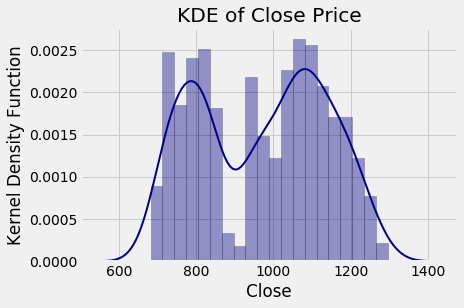

In [81]:
sns.distplot(df['Close'], label = 'Kernel Density Function', hist=True, kde=True, 
             bins= 20, color = 'darkblue', 
             hist_kws={'edgecolor':'black'},
             kde_kws={'linewidth': 2})
plt.ylabel('Kernel Density Function')
plt.title('KDE of Close Price')

The histogram shows Bi-Modal Distribution

**Stationarity of Time Series:**
Stationarity is the property of exhibiting constant statistical properties (mean, variance, autocorrelation, etc.). If the mean of a time-series increases over time, then it’s not stationary.

Test for stationary:


1.   **Plotting rolling statistics:**
      If rolling statistics exhibits clear trend (upward or downward), varying variance (increasing or decreasing) then we can say series is not very stationary
2.   **ADF(Augmented Dickey Fuller test):**
      Test statistics - % confidence if time series is stationary or not
3.   **KPSS:** 
      Test trend stationarity. Null hypothesis with X% confidence P-value > threshold -> Reject hypothesis. Conclude that series is trend-stationary
4.    **ACF(Autocorrelation plots):**
      Represents autocorrelation with lags itself



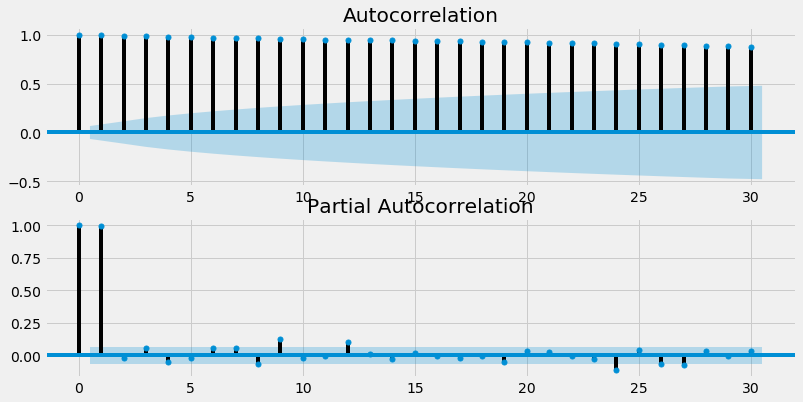

In [82]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

fig, ax = plt.subplots(2, figsize=(12,6))
ax[0] = plot_acf(df.Close.dropna(), ax=ax[0])
ax[1] = plot_pacf(df.Close.dropna(), ax=ax[1])

**Time series Decomposition:**
Time series is a combination of Level, Trend, Seasonality, Noise


1. Level : Average value in series
2. Trend: Increasing and decreasing value in series
3. Seasonality: Repeating short term cycle in the series
4. Noise: Random variation in the series

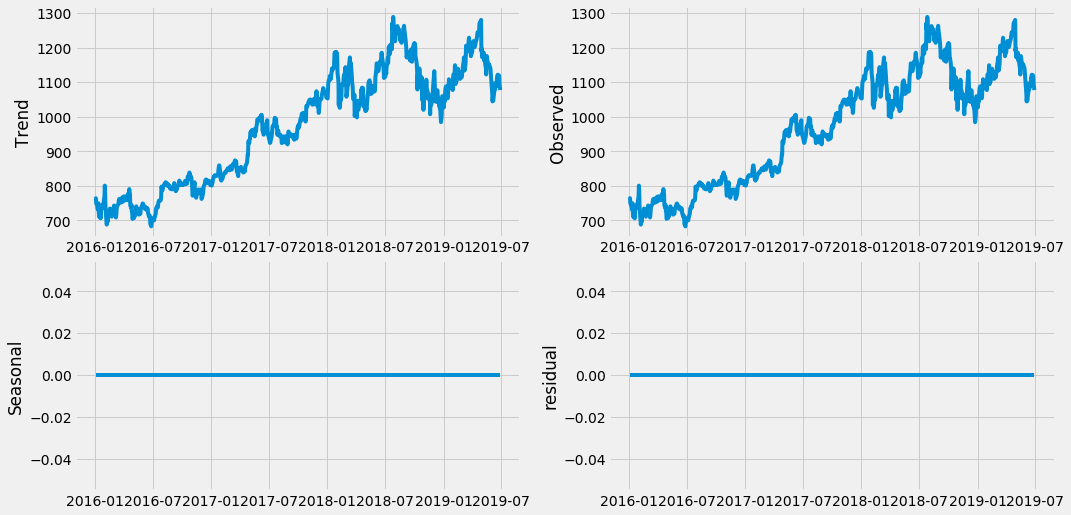

In [131]:
from statsmodels.tsa.seasonal import seasonal_decompose
result = seasonal_decompose(df.Open, model='additive', freq=1)

x = df.index
y1 = result.trend
y2 = result.seasonal
y3 = result.observed
y4 =result.resid

plt.figure(figsize=(16,8))
plt.title('Time series decomposition')

#trend
plt.subplot(221)
plt.plot(x,y1)
plt.ylabel('Trend')

#observed
plt.subplot(222)
plt.plot(x,y3)
plt.ylabel('Observed')

#seasonal
plt.subplot(223)
plt.plot(x,y2)
plt.ylabel('Seasonal')

#residual
plt.subplot(224)
plt.plot(x,y4)
plt.ylabel('residual')

plt.subplots_adjust(top=0.92, bottom=0.08, left=0.10, right=0.95, hspace=0.10,
                    wspace=0.20)
plt.show()

**Trend Decomposition:**

Simplest way to remove trend is to take first order differencing i.e difference in observation(t) - observation(t-1)



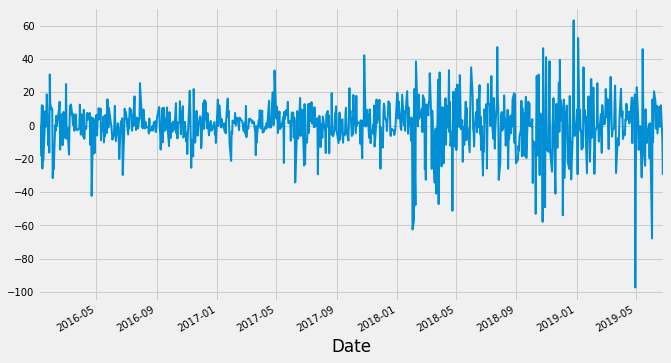

In [132]:
df.Close.diff().plot(figsize=(10,6), linewidth=2, fontsize=10)

**Simple Moving Average (SMA)**

- Rolling window - 5 day:

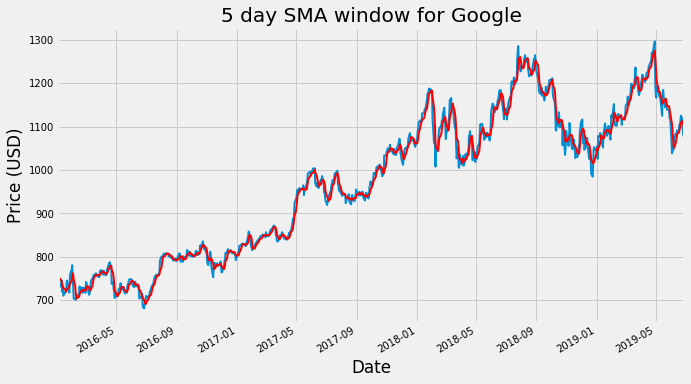

In [133]:
rolling = df.Close.rolling(window=5)
rolling_mean = rolling.mean()
df.Close.plot(figsize=(10,6), linewidth=2, fontsize=10)
rolling_mean.plot(figsize=(10,6), linewidth=2, fontsize=10, color='red')
plt.title('5 day SMA window for Google')
plt.ylabel('Price (USD)')
plt.show();



*   Rolling window: 20 day:



In [134]:
df.tail()

,Open,Close,High,Low,Volume
Date,,,,,
2019-06-24,1120.000000,1116.699951,1123.569946,1113.310059,1211800
2019-06-25,1115.079956,1087.579956,1115.699951,1084.599976,1582200
2019-06-26,1091.000000,1080.319946,1095.119995,1073.689941,1734900
2019-06-27,1086.750000,1076.630005,1088.459961,1075.849976,1203900
2019-06-28,1077.229980,1082.800049,1082.800049,1073.800049,1683600


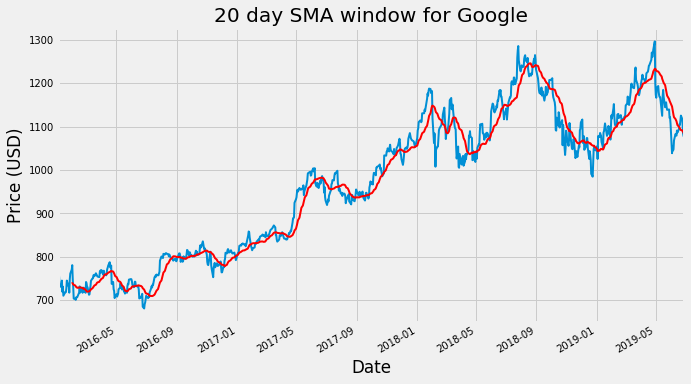

In [135]:
rolling = df.Close.rolling(window=20)
df['20_day_SMA'] = rolling.mean()
df.Close.plot(figsize=(10,6), linewidth=2, fontsize=10)
df['20_day_SMA'].plot(figsize=(10,6), linewidth=2, fontsize=10, color='red')
plt.title('20 day SMA window for Google')
plt.ylabel('Price (USD)')
plt.show();

In [136]:
df.tail()

,Open,Close,High,Low,Volume,20_day_SMA
Date,,,,,,
2019-06-24,1120.000000,1116.699951,1123.569946,1113.310059,1211800,1091.026501
2019-06-25,1115.079956,1087.579956,1115.699951,1084.599976,1582200,1088.427496
2019-06-26,1091.000000,1080.319946,1095.119995,1073.689941,1734900,1086.446497
2019-06-27,1086.750000,1076.630005,1088.459961,1075.849976,1203900,1084.207495
2019-06-28,1077.229980,1082.800049,1082.800049,1073.800049,1683600,1083.022498


**Bollinger bands:**
Total 3 bands to calculate:
1. Middle band: (tf)SMA of the price
2. Top band: (tf)SMA + ((tf)Standard deviation of the price *x)
3. Bottom band: (tf)SMA - ((tf)Standard deviation of the price *x)

Typically, x=2

In [0]:
mean = df['Close'].rolling(window=20).mean()
std = df.Close.rolling(window=20).std()
df['Upper_band'] = mean  + (std * 2)
df['Lower_band'] = mean - (std * 2)

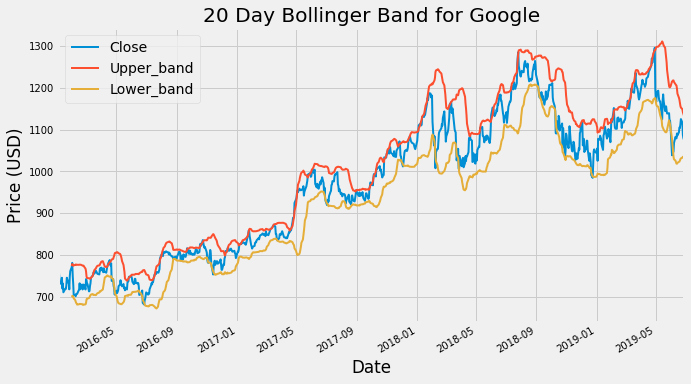

In [138]:
df[['Close','Upper_band','Lower_band']].plot(figsize=(10,6), linewidth=2, fontsize=10)
plt.title('20 Day Bollinger Band for Google')
plt.ylabel('Price (USD)')
plt.show();

No handles with labels found to put in legend.


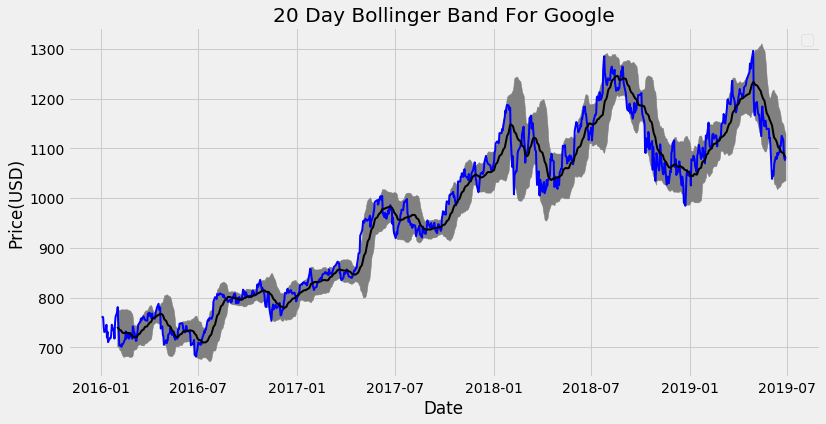

In [139]:
plt.style.use('fivethirtyeight')
fig = plt.figure(figsize=(12,6))
ax = fig.add_subplot(111)

# Get index values for the X axis for facebook DataFrame
x_axis = df.index.get_level_values(0)

# Plot shaded 21 Day Bollinger Band for Facebook
ax.fill_between(x_axis, df['Upper_band'], df['Lower_band'], color='grey')

# Plot Adjust Closing Price and Moving Averages
ax.plot(x_axis, df['Close'], color='blue', lw=2)
ax.plot(x_axis, df['20_day_SMA'], color='black', lw=2)

# Set Title & Show the Image
ax.set_title('20 Day Bollinger Band For Google')
ax.set_xlabel('Date')
ax.set_ylabel('Price(USD)')
ax.legend()
plt.show();

Mean reversal Pairs trading strategy (Bollinger bands) with a Kalman Filter